# About the notebook

In [1]:
### import libraries
suppressMessages(suppressWarnings(library(tidyverse)))
suppressMessages(suppressWarnings(library(MPSK)))
suppressMessages(suppressWarnings(library(tsne)))

suppressMessages(suppressWarnings(library(flowCore)))
suppressMessages(suppressWarnings(library(flowStats)))
suppressMessages(suppressWarnings(library(flowViz)))
suppressMessages(suppressWarnings(library(flowMatch)))
suppressMessages(suppressWarnings(library(flowMap)))

suppressMessages(suppressWarnings(library(igraph)))
suppressMessages(suppressWarnings(library(pheatmap)))
suppressMessages(suppressWarnings(library(RColorBrewer)))
suppressMessages(suppressWarnings(library(gplots)))

### set directories
dat_dir = "/data/clintko/SMPK"

# Import data

In [2]:
dat_mpsk_raw  = read_delim(file.path(dat_dir, "ep8cs_dat_mpsk_raw.txt"),  delim = "\t")
dat_mpsk_cal  = read_delim(file.path(dat_dir, "ep8cs_dat_mpsk_cal.txt"),  delim = "\t")
dat_gaussnorm = read_delim(file.path(dat_dir, "ep8cs_dat_gaussnorm.txt"), delim = "\t")

Parsed with column specification:
cols(
  sample = col_character(),
  cluster = col_integer(),
  `FSC-A` = col_double(),
  `SSC-A` = col_double(),
  Aqua = col_double(),
  CD3 = col_double(),
  CD4 = col_double(),
  CD8 = col_double(),
  TNFa = col_double(),
  IL2 = col_double(),
  IFNg = col_double(),
  CD107a = col_double()
)
Parsed with column specification:
cols(
  sample = col_character(),
  cluster = col_integer(),
  `FSC-A` = col_double(),
  `SSC-A` = col_double(),
  Aqua = col_double(),
  CD3 = col_double(),
  CD4 = col_double(),
  CD8 = col_double(),
  TNFa = col_double(),
  IL2 = col_double(),
  IFNg = col_double(),
  CD107a = col_double()
)
Parsed with column specification:
cols(
  sample = col_character(),
  `FSC-A` = col_double(),
  `SSC-A` = col_double(),
  Aqua = col_double(),
  CD3 = col_double(),
  CD4 = col_double(),
  CD8 = col_double(),
  TNFa = col_double(),
  IL2 = col_double(),
  IFNg = col_double(),
  CD107a = col_double()
)


# Scatter plot

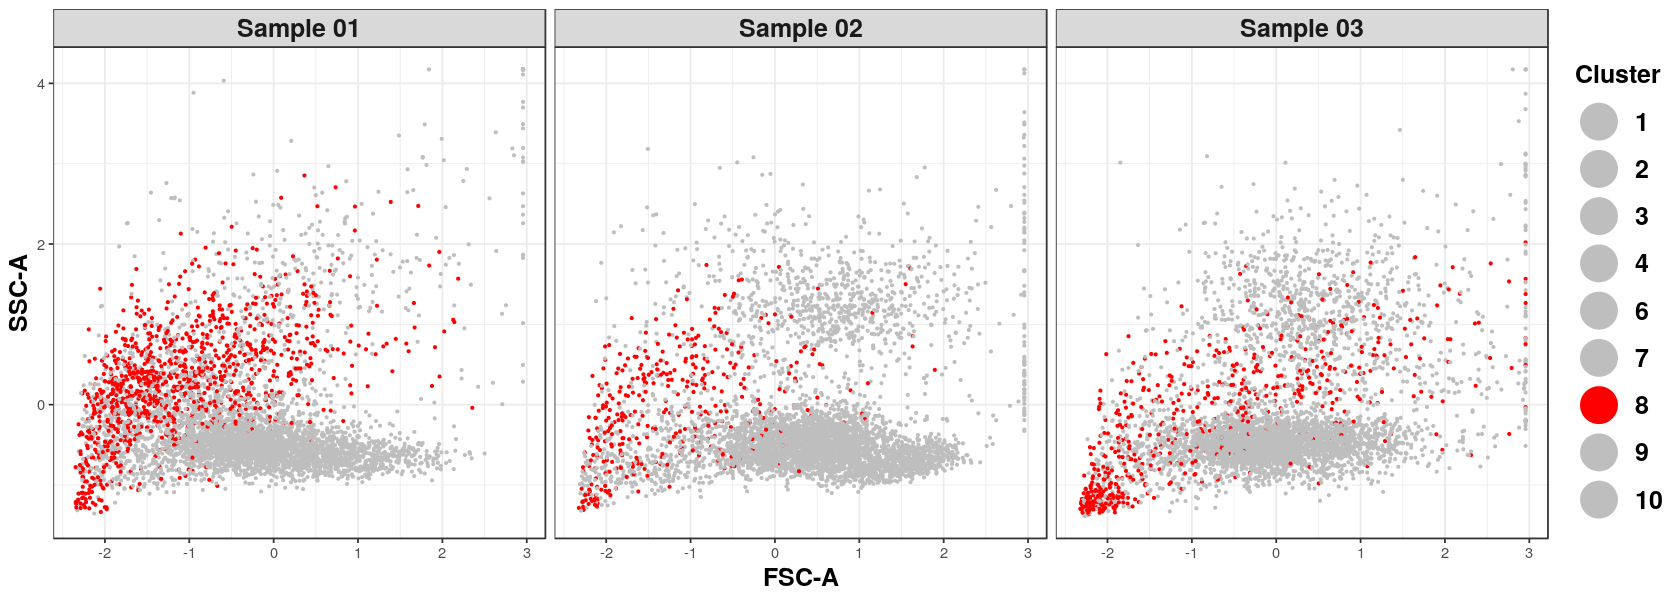

In [96]:
###
dat = dat_mpsk_raw %>% 
    dplyr::filter(sample %in% c("01", "02", "03")) %>%
    group_by(sample) %>%
    sample_n(size = 5000)
dat$sample  = paste("Sample", dat$sample)
dat$cluster = factor(dat$cluster, levels = 1:10)

###
idx  = 8
clusters = c(1, 2, 3, 4, 6, 7, 8, 9, 10)
cols = c("red", rep("grey", 8))
names(cols) = c(idx, setdiff(clusters, idx))

gp = ggplot(dat, aes(x = `FSC-A`, y = `SSC-A`, color = cluster)) +
    geom_point(size = 0.5) +
    scale_color_manual(values = cols) +
    labs(x = "FSC-A", y = "SSC-A", color = "Cluster") +
    facet_wrap(~sample) + 
    theme_bw() +
    guides(colour = guide_legend(override.aes = list(size=10))) +
    theme(legend.title = element_text(size = 15, face = "bold"),
          legend.text  = element_text(size = 15, face = "bold"),
          strip.text   = element_text(size = 15, face = "bold"),
          axis.title   = element_text(size = 15, face = "bold"))

options(repr.plot.width = 14, repr.plot.height = 5)
print(gp)

# t-SNE

In [49]:
system(paste("ls -1", dat_dir), intern = TRUE)

[1] "C.txt"                       "ep8cs_dat_gaussnorm.txt"    
 [3] "ep8cs_dat_mpsk_cal.txt"      "ep8cs_dat_mpsk_raw.txt"     
 [5] "ep8cs_mpsk_cal.RDS"          "ep8cs_mpsk_chainSummary.RDS"
 [7] "ep8cs_mpsk_raw.RDS"          "ep8cs_mpsk_relab.RDS"       
 [9] "ep8cs_tsne_gaussnorm.txt"    "ep8cs_tsne_idx.txt"         
[11] "ep8cs_tsne_mpsk_cal.txt"     "ep8cs_tsne_raw.txt"         
[13] "ep8cs_tsne_test.txt"         "Y_raw.txt"

Import tsne coordinates

In [54]:
tsne_mpsk_raw  = read_delim(file.path(dat_dir, "ep8cs_tsne_raw.txt"),       delim = "\t", col_names = FALSE)
tsne_mpsk_cal  = read_delim(file.path(dat_dir, "ep8cs_tsne_mpsk_cal.txt"),  delim = "\t", col_names = FALSE)
tsne_gaussnorm = read_delim(file.path(dat_dir, "ep8cs_tsne_gaussnorm.txt"), delim = "\t", col_names = FALSE)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double()
)


tsne plot for raw (scaled) data

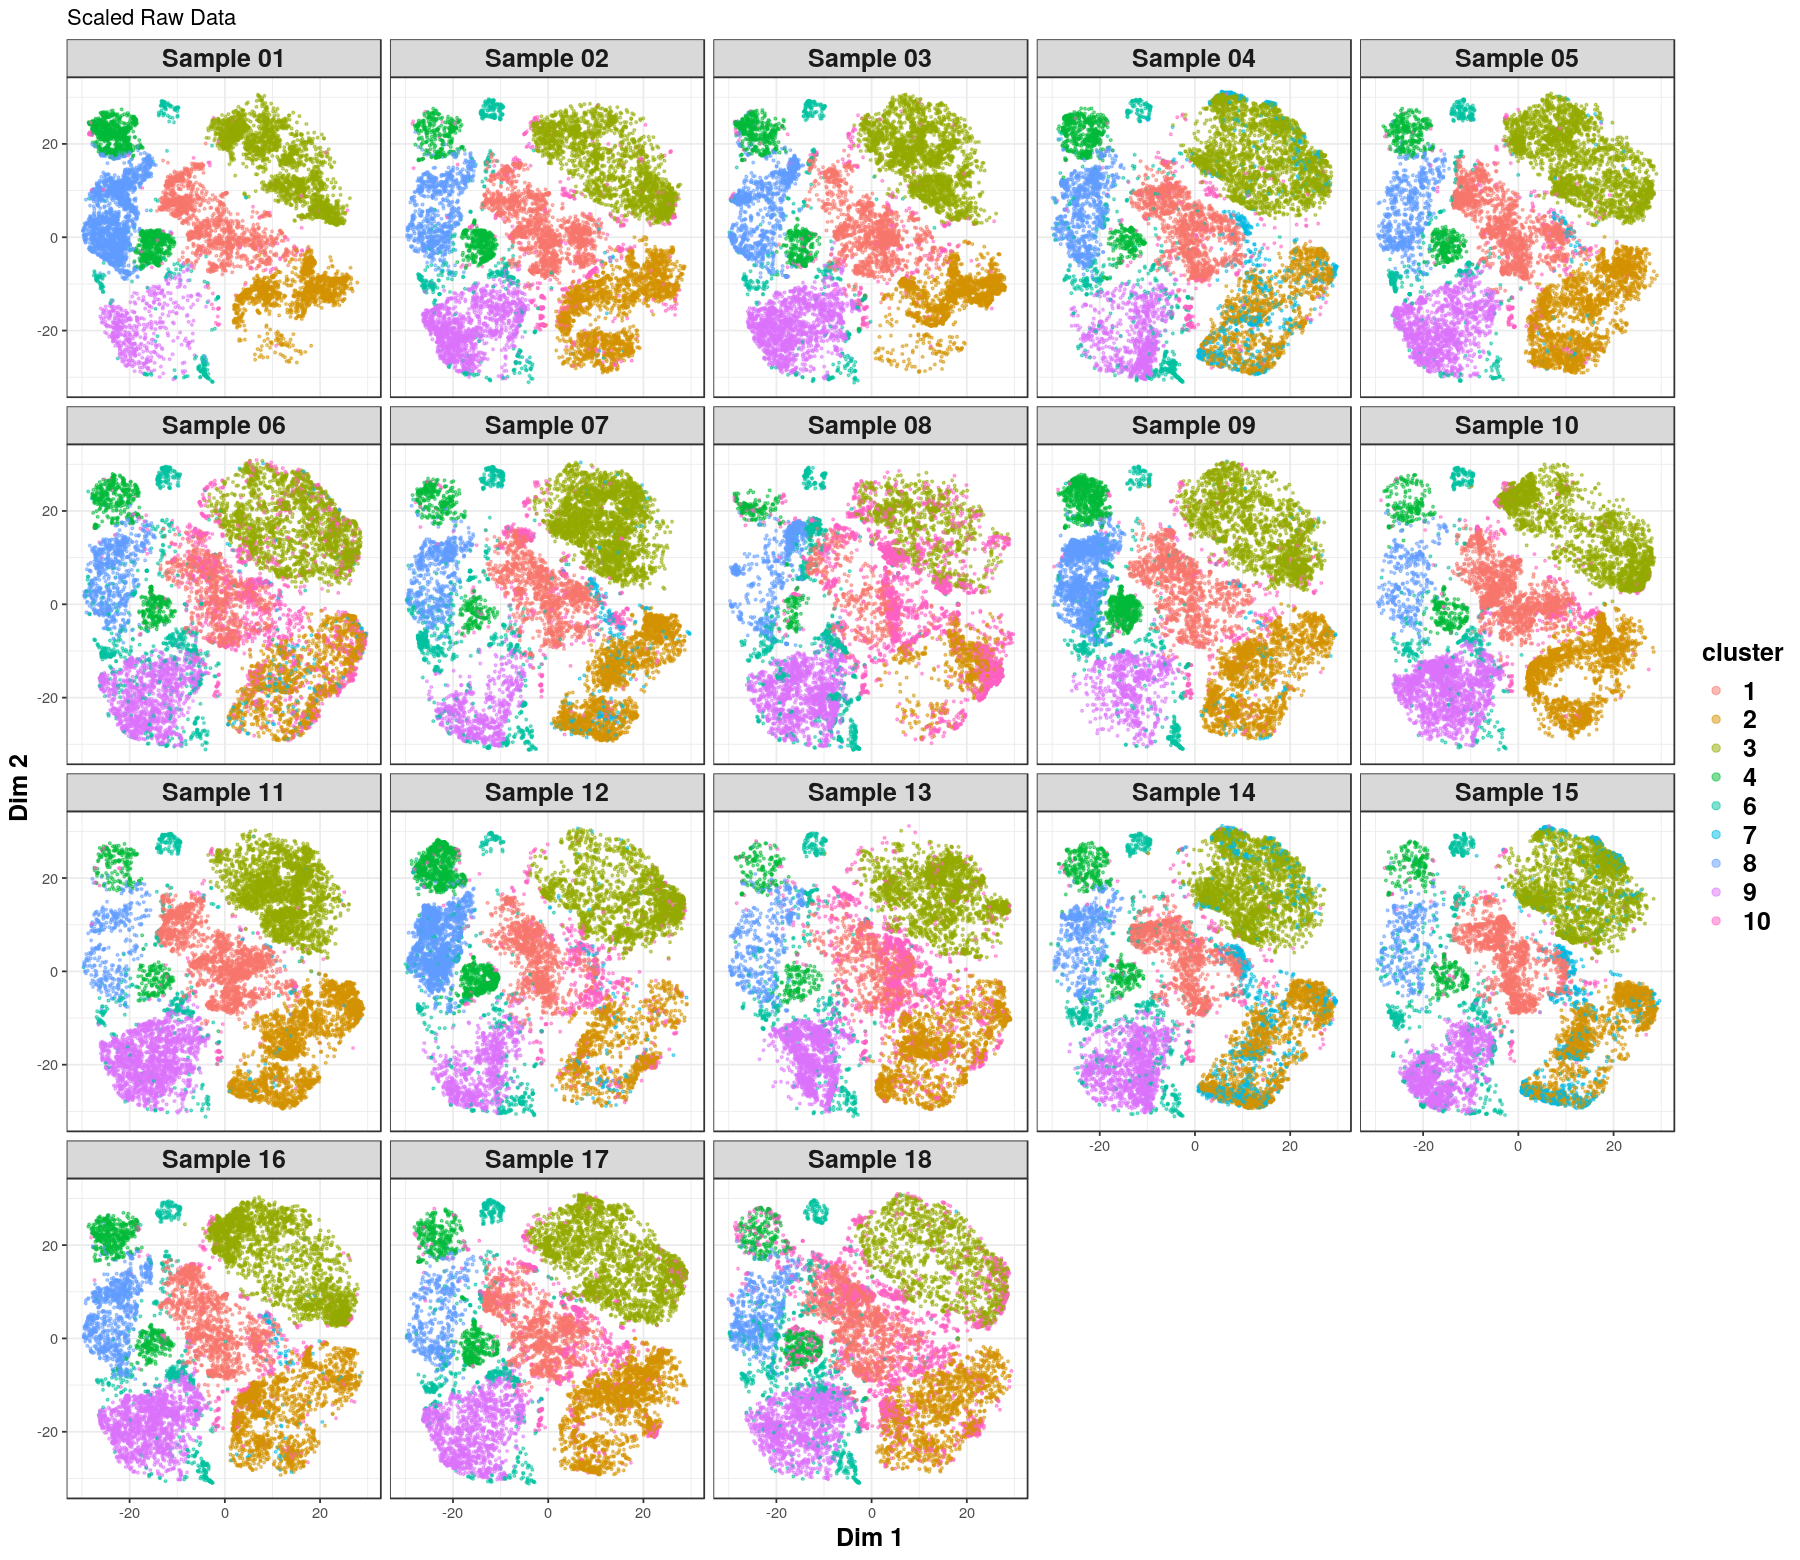

In [92]:
dat = tsne_mpsk_raw
dat$sample  = paste("Sample", dat_mpsk_raw$sample)
dat$cluster = factor(dat_mpsk_raw$cluster)
dat$CD8     = dat_mpsk_raw$CD8

options(repr.plot.width = 15, repr.plot.height = 13)
gp = dat %>% ggplot(., aes(x = X1, y = X2, color = cluster)) + 
    geom_point(size = 0.5, alpha = 0.5) + 
    #scale_colour_gradient(low = "white", high = "red") +  
    facet_wrap(~sample) + 
    theme_bw() +
    labs(x = "Dim 1", y = "Dim 2", title = "Scaled Raw Data") +
    guides(colour = guide_legend(override.aes = list(size=2))) +
    theme(legend.title = element_text(size = 15, face = "bold"),
          legend.text  = element_text(size = 15, face = "bold"),
          strip.text   = element_text(size = 15, face = "bold"),
          axis.title   = element_text(size = 15, face = "bold"))

print(gp)

tsne for data after MPSK calibration

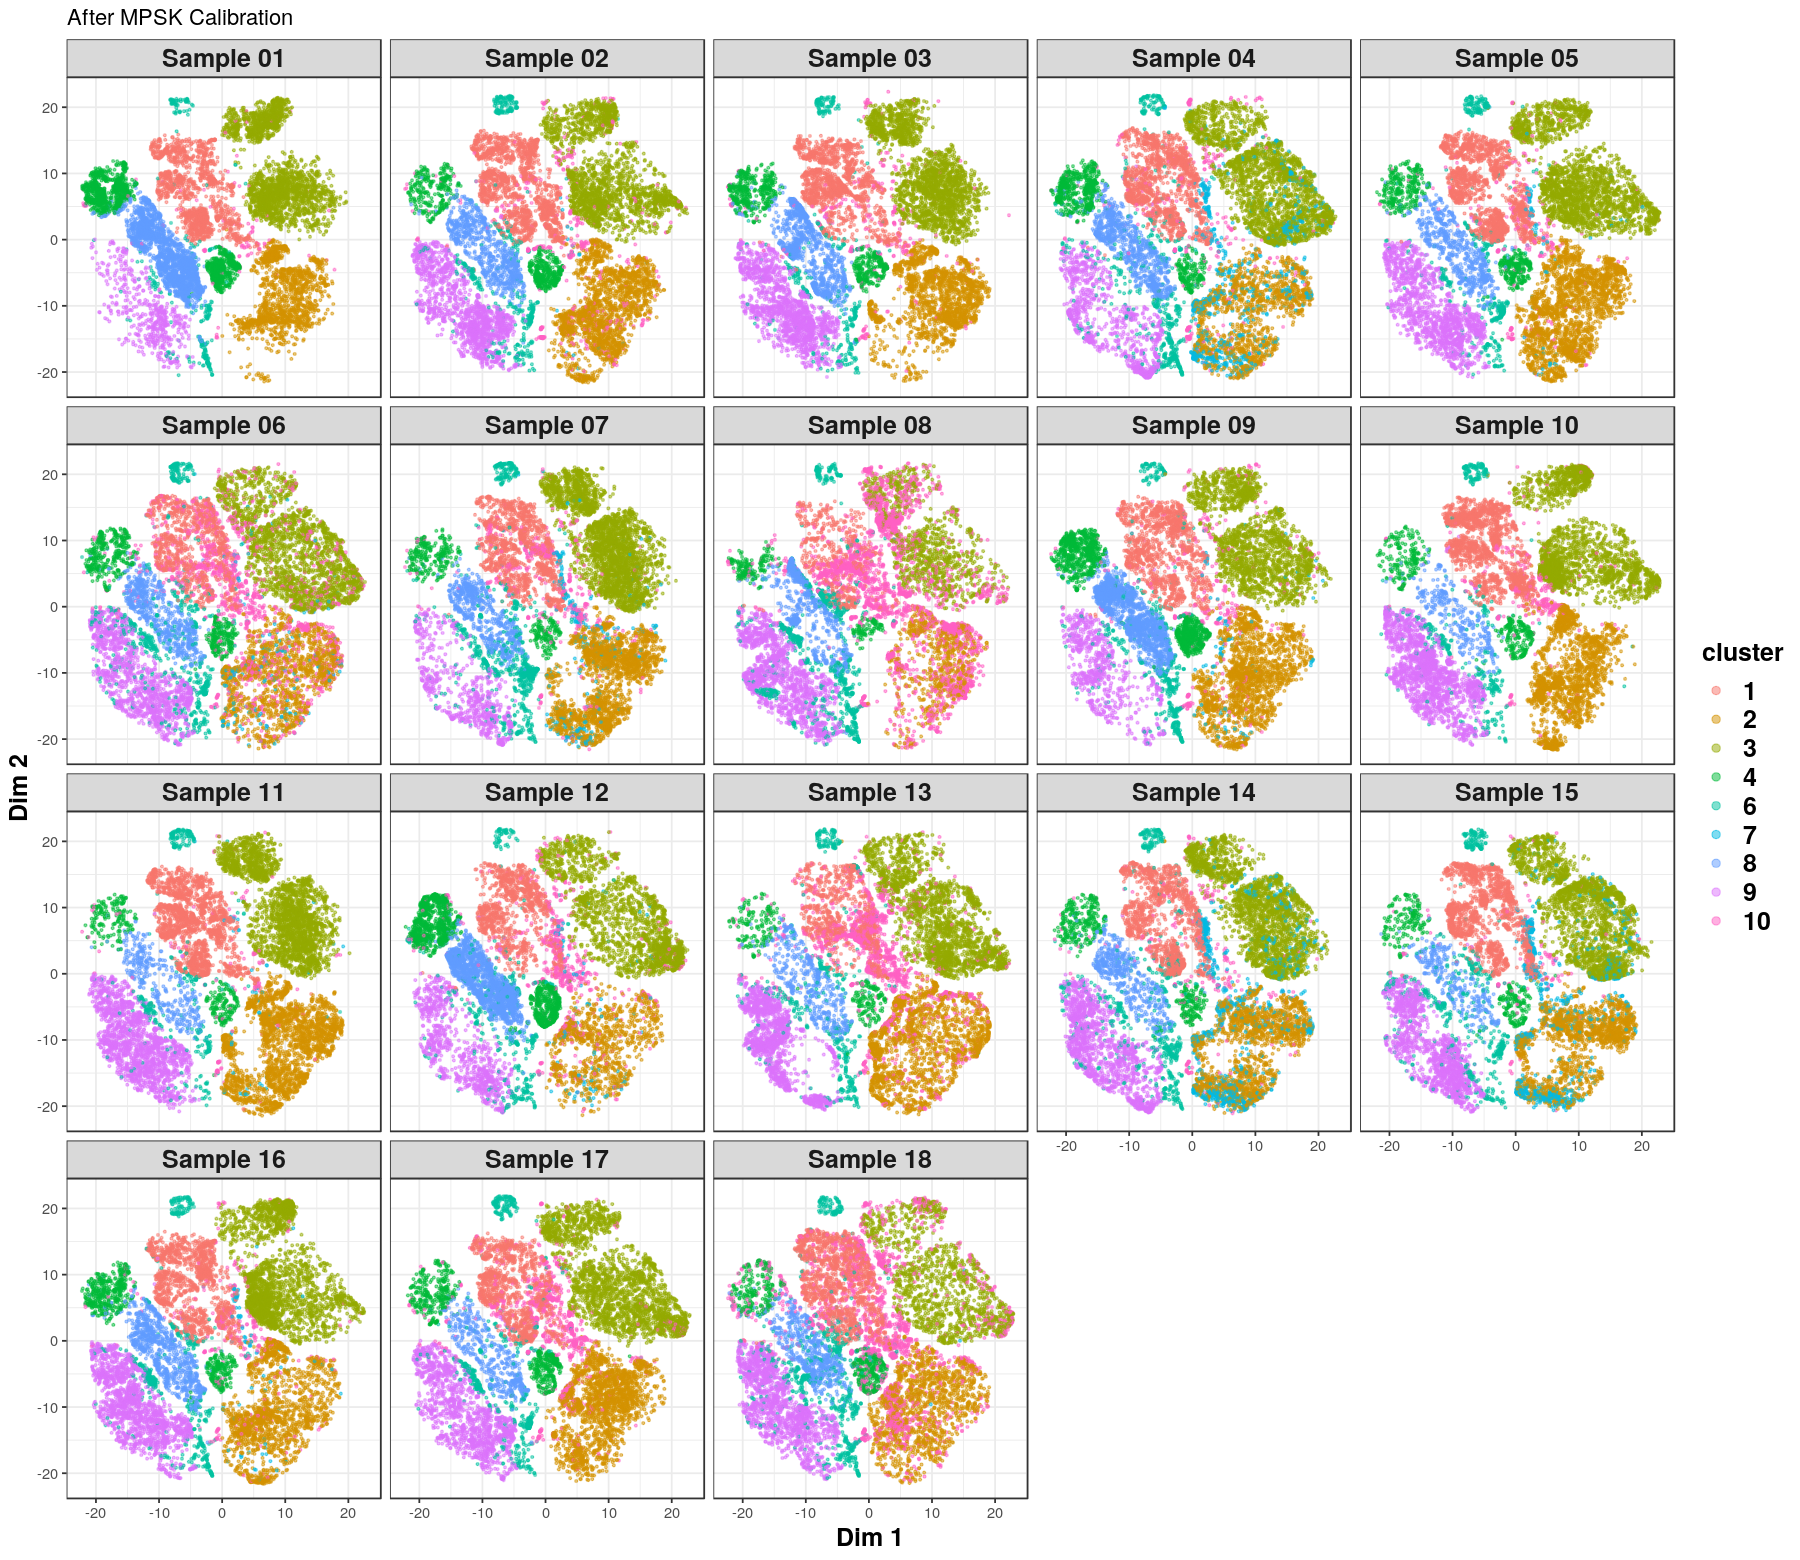

In [93]:
dat = tsne_mpsk_cal
dat$sample  = paste("Sample", dat_mpsk_raw$sample)
dat$cluster = factor(dat_mpsk_raw$cluster)
dat$CD8     = dat_mpsk_raw$CD8

options(repr.plot.width = 15, repr.plot.height = 13)
gp = dat %>% ggplot(., aes(x = X1, y = X2, color = cluster)) + 
    geom_point(size = 0.5, alpha = 0.5) + 
    #scale_colour_gradient(low = "white", high = "red") +  
    facet_wrap(~sample) + 
    theme_bw() +
    labs(x = "Dim 1", y = "Dim 2", title = "After MPSK Calibration") +
    guides(colour = guide_legend(override.aes = list(size=2))) +
    theme(legend.title = element_text(size = 15, face = "bold"),
          legend.text  = element_text(size = 15, face = "bold"),
          strip.text   = element_text(size = 15, face = "bold"),
          axis.title   = element_text(size = 15, face = "bold"))

print(gp)

tsne of gaussnorm batch removal

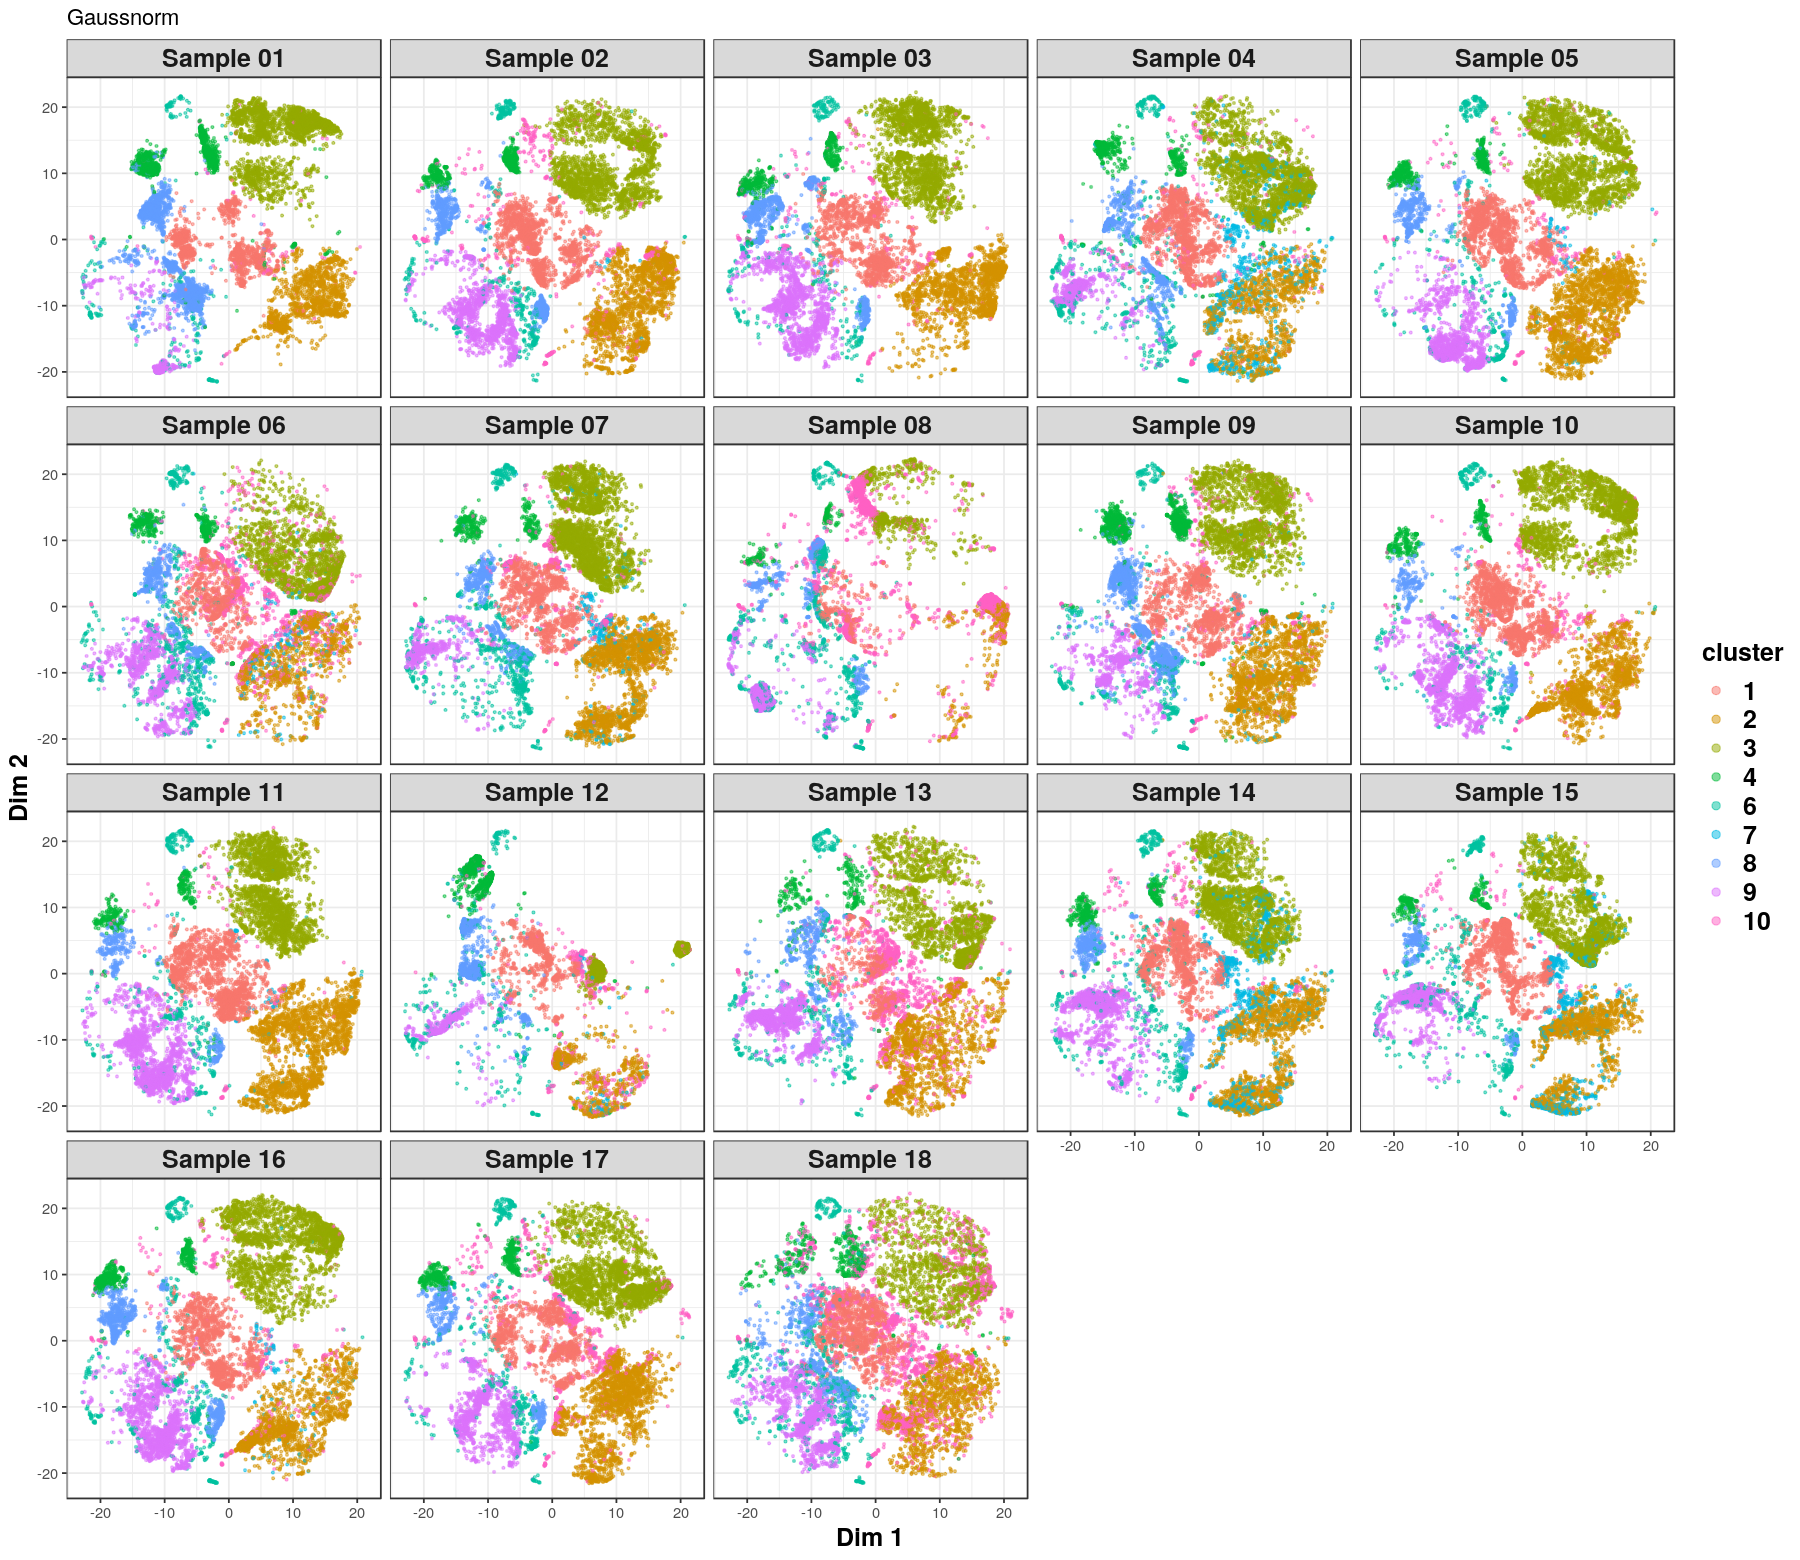

In [94]:
dat = tsne_gaussnorm
dat$sample  = paste("Sample", dat_mpsk_raw$sample)
dat$cluster = factor(dat_mpsk_raw$cluster)
dat$CD8     = dat_mpsk_raw$CD8

options(repr.plot.width = 15, repr.plot.height = 13)
gp = dat %>% ggplot(., aes(x = X1, y = X2, color = cluster)) + 
    geom_point(size = 0.5, alpha = 0.5) + 
    #scale_colour_gradient(low = "white", high = "red") +  
    facet_wrap(~sample) + 
    theme_bw() +
    labs(x = "Dim 1", y = "Dim 2", title = "Gaussnorm") +
    guides(colour = guide_legend(override.aes = list(size=2))) +
    theme(legend.title = element_text(size = 15, face = "bold"),
          legend.text  = element_text(size = 15, face = "bold"),
          strip.text   = element_text(size = 15, face = "bold"),
          axis.title   = element_text(size = 15, face = "bold"))

print(gp)